In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
student_df = pd.read_csv('/content/drive/MyDrive/CSE422 Lab Project/student-por.csv')
student_df.head()

In [192]:
student_df = pd.read_csv('student-por.csv')
student_df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11


In [193]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [194]:
student_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Sum of missing values in the dataset: 0
Columns with missing values
: Series([], dtype: int64)


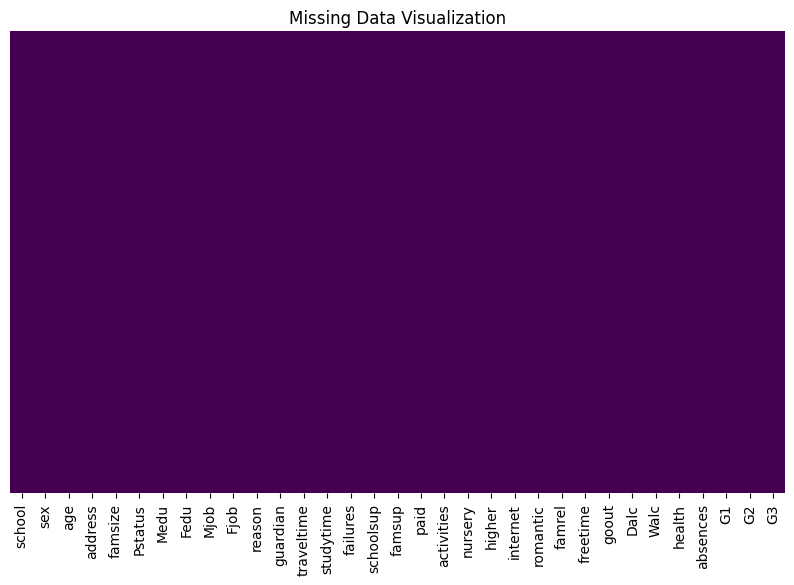

In [195]:
missing_values = student_df.isnull().sum()
print(f"Sum of missing values in the dataset: {missing_values.sum()}")
print(f"Columns with missing values\n: {missing_values[missing_values > 0]}")
# Plotting missing values
plt.figure(figsize=(10, 6))
sns.heatmap(student_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()

In [196]:
print("Number of duplicate rows in the dataset: ", student_df.duplicated().sum())

Number of duplicate rows in the dataset:  0


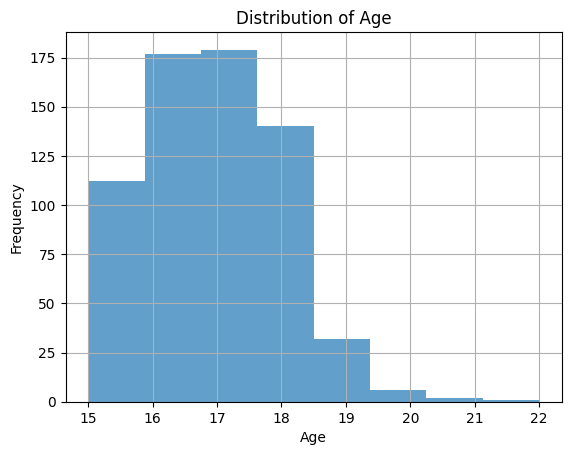

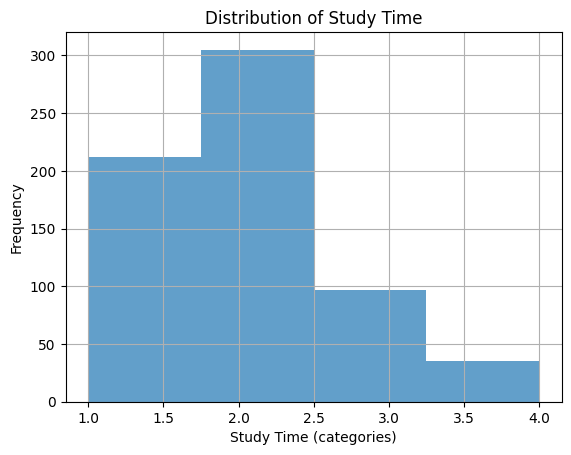

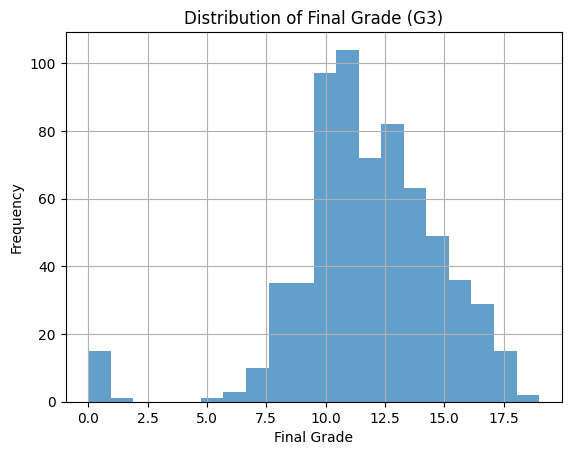

In [197]:
import matplotlib.pyplot as plt

# Plotting histograms for age, study time, and final grade
student_df['age'].hist(bins=8, alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

student_df['studytime'].hist(bins=4, alpha=0.7)
plt.title('Distribution of Study Time')
plt.xlabel('Study Time (categories)')
plt.ylabel('Frequency')
plt.show()

sns.set(style="whitegrid")
sns.histplot(student_df['G3'], bins=20, alpha=0.7)
plt.title('Distribution of Final Grade (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()


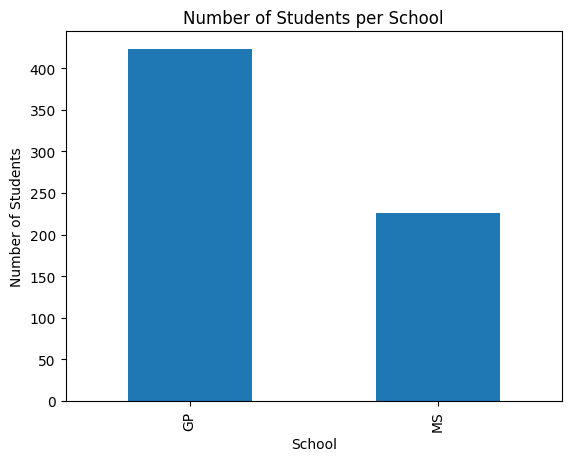

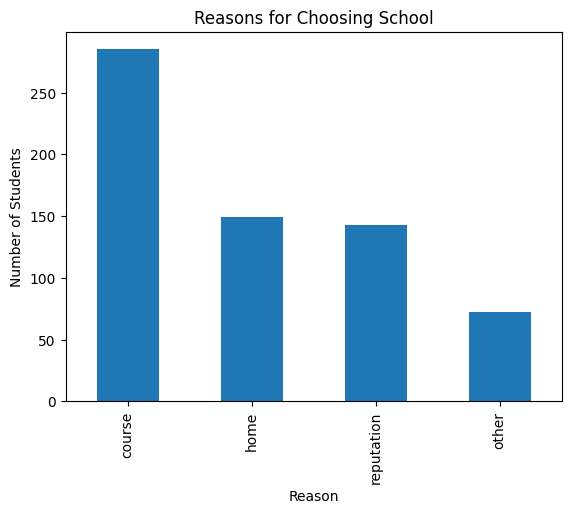

In [198]:
# Plotting bar charts for categorical student_df
student_df['school'].value_counts().plot(kind='bar')
plt.title('Number of Students per School')
plt.xlabel('School')
plt.ylabel('Number of Students')
plt.show()

student_df['reason'].value_counts().plot(kind='bar')
plt.title('Reasons for Choosing School')
plt.xlabel('Reason')
plt.ylabel('Number of Students')
plt.show()


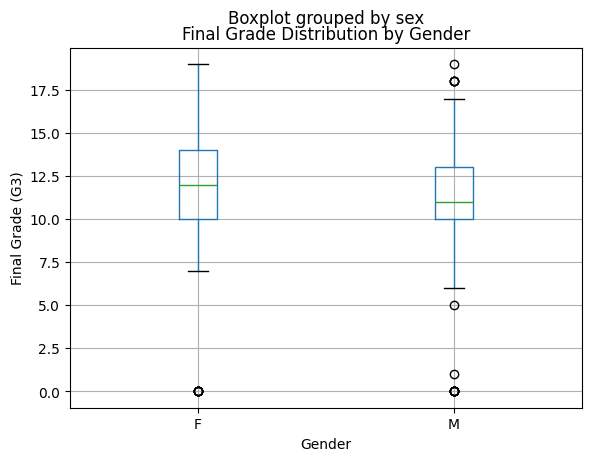

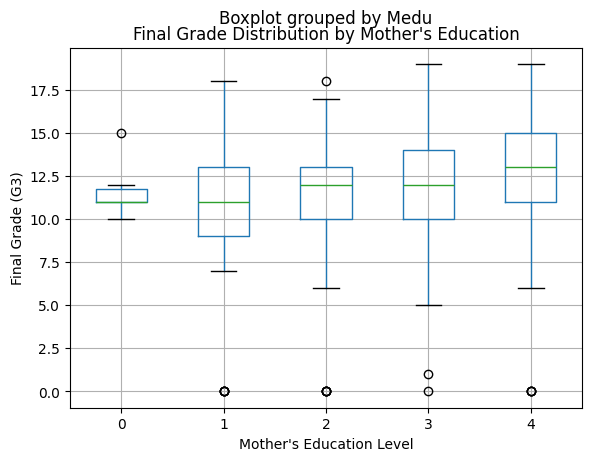

In [200]:
# Box plots for final grades by gender and parental education level
student_df.boxplot(column='G3', by='sex')
plt.title('Final Grade Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Final Grade (G3)')
plt.show()

student_df.boxplot(column='G3', by='Medu')
plt.title('Final Grade Distribution by Mother\'s Education')
plt.xlabel('Mother\'s Education Level')
plt.ylabel('Final Grade (G3)')
plt.show()


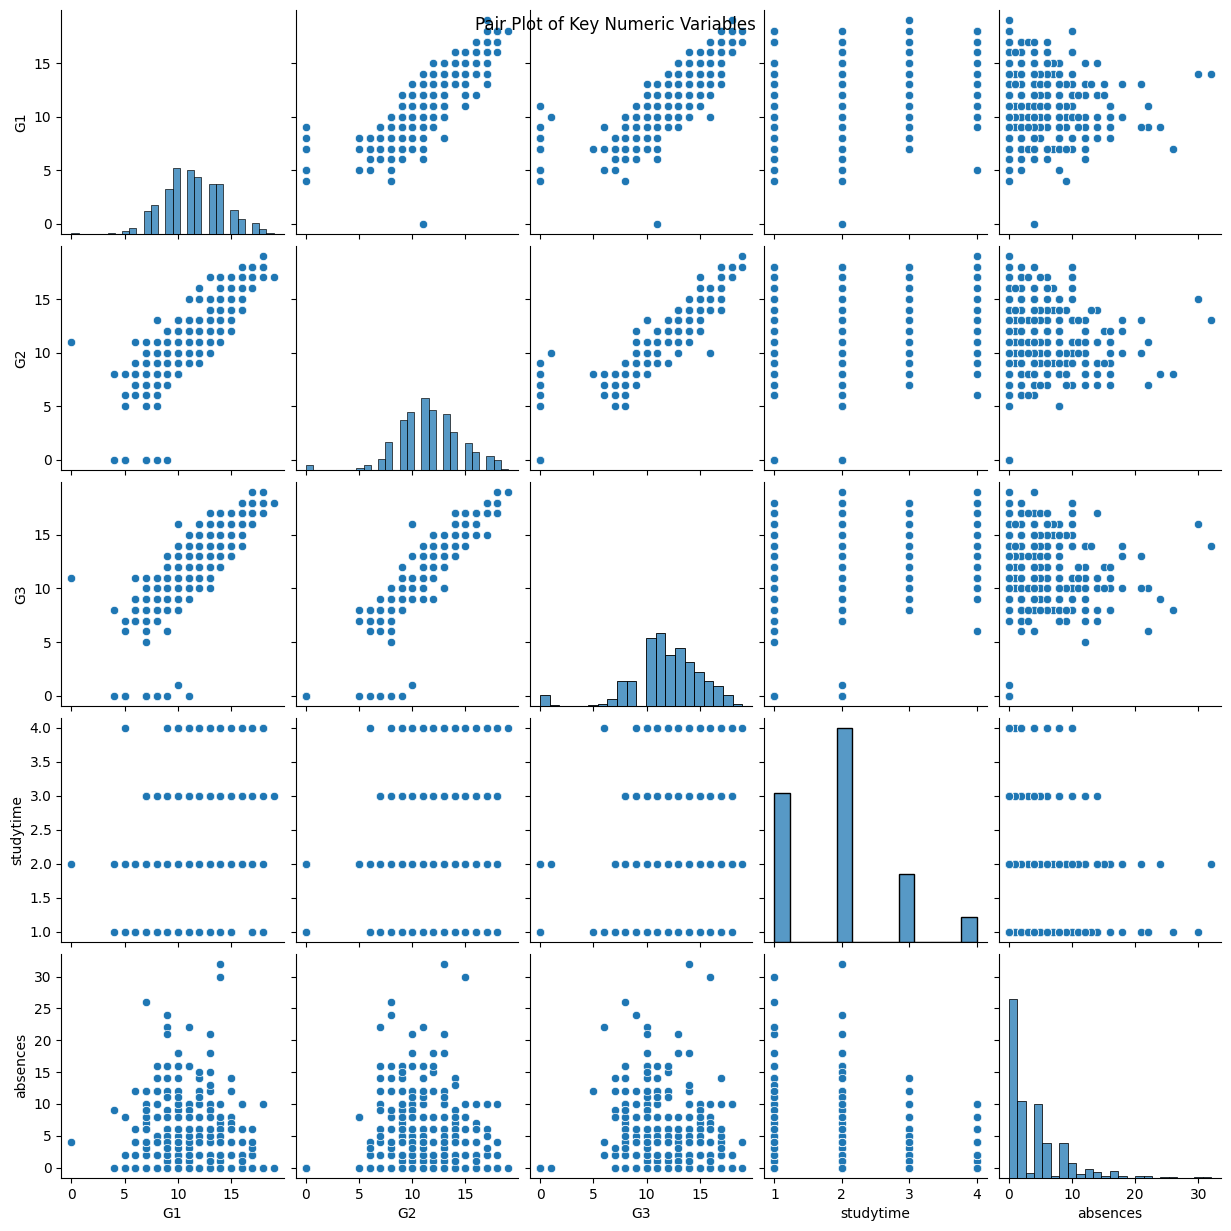

In [202]:
sns.pairplot(student_df[['G1', 'G2', 'G3', 'studytime', 'absences']])
plt.suptitle('Pair Plot of Key Numeric Variables', verticalalignment='top')
plt.show()


In [203]:
categorical = student_df.select_dtypes(include=['object']).columns.tolist()
print(f"{len(categorical)} Columns with categorical data: {categorical}")

numerical = student_df.select_dtypes(include=['int', 'float']).columns.tolist()
print(f"{len(numerical)} Columns with numerical data: {numerical}")

17 Columns with categorical data: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
16 Columns with numerical data: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [204]:
binary_categorical = [col for col in categorical if student_df[col].nunique() == 2]
print(f"{len(binary_categorical)} Binary Categorical Columns: {binary_categorical}")

non_binary_categorical = [col for col in categorical if student_df[col].nunique() > 2]
print(f"{len(non_binary_categorical)} Non-Binary Categorical Columns: {non_binary_categorical}")

13 Binary Categorical Columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
4 Non-Binary Categorical Columns: ['Mjob', 'Fjob', 'reason', 'guardian']


In [205]:
label_encoder = LabelEncoder()
for col in binary_categorical:
    student_df[col] = label_encoder.fit_transform(student_df[col])

student_df = pd.get_dummies(student_df, columns=non_binary_categorical, drop_first=True).astype(int)

student_df.shape

(649, 42)

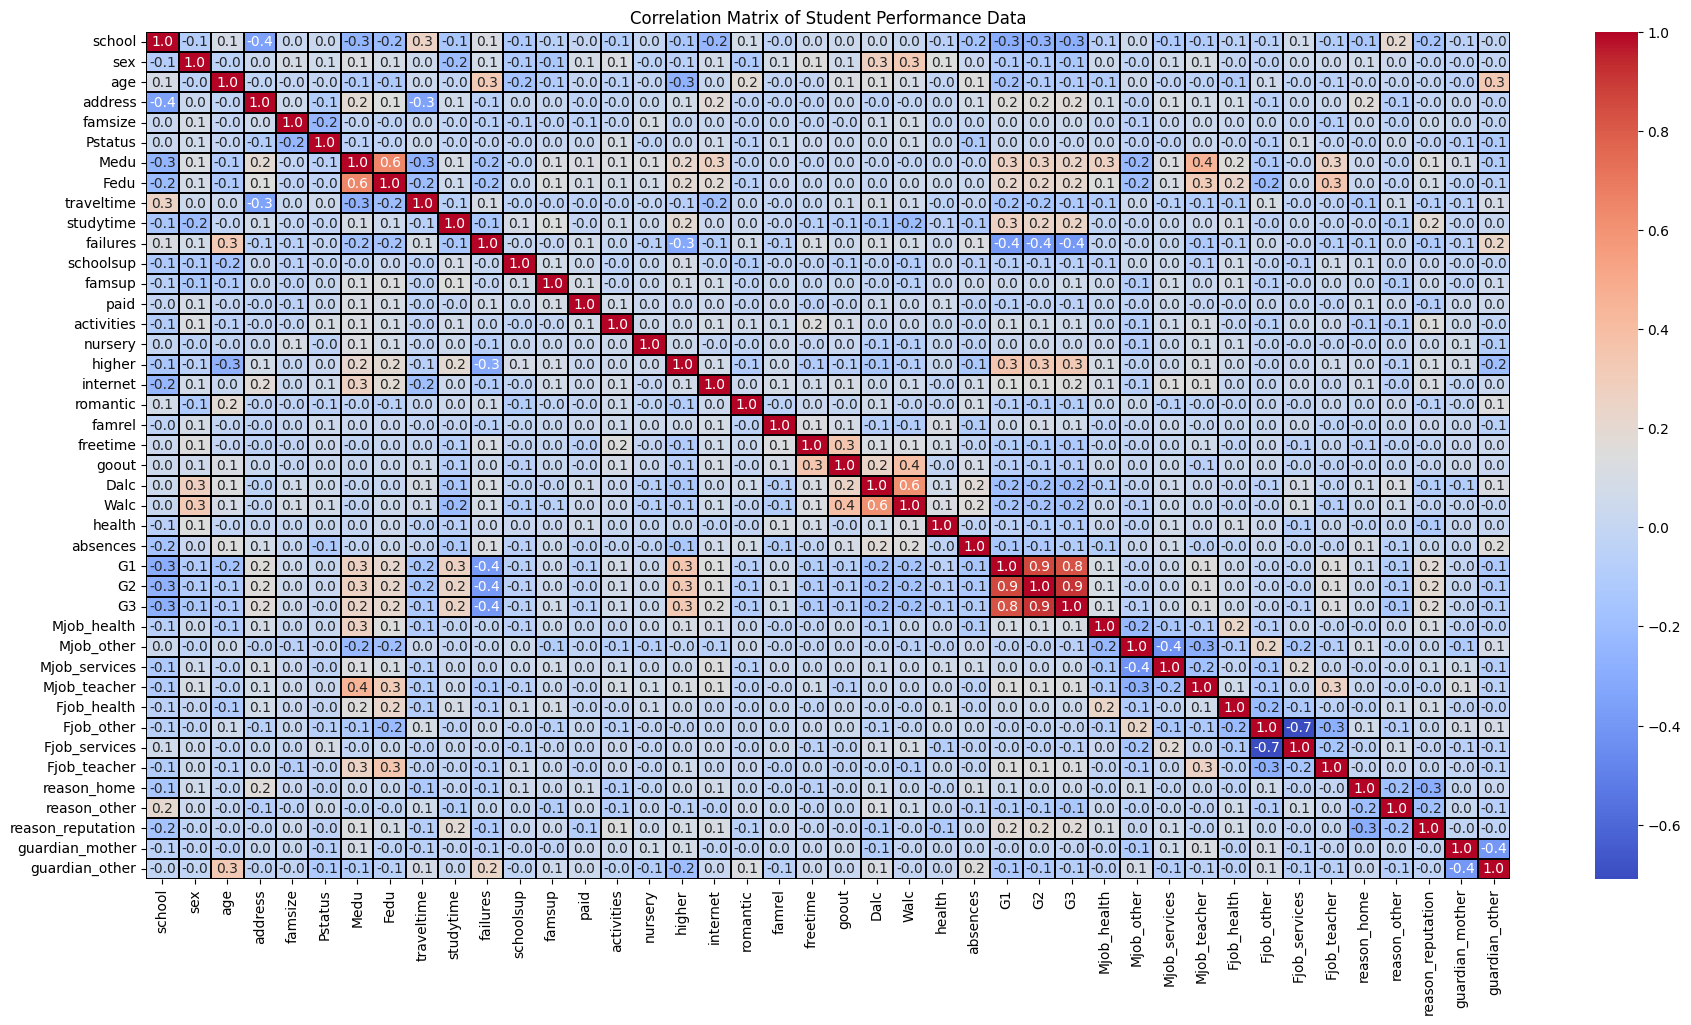

In [206]:
corr_matrix = student_df.corr()

plt.figure(figsize=(22, 11))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.1, linecolor='black', fmt=".1f", annot=True)
plt.title('Correlation Matrix of Student Performance Data')
plt.show()

In [ ]:
# since Medu and Fedu has high positive correlation (0.6)
student_df['ParentAvgEdu'] = (student_df['Medu'] + student_df['Fedu']) / 2
student_df.drop(['Medu', 'Fedu'], axis=1, inplace=True)
# Dalc and Walc has correlation of 0.6
student_df['Total_Alc'] = student_df['Dalc'] + student_df['Walc']
student_df.drop(['Dalc', 'Walc'], axis=1, inplace=True)
# since G1 and G2 has strongly positive correlation of 0.9
# and G2 has slightly higher correlation with G3 than G1
student_df.drop(['G1'], axis=1, inplace=True)
# Fjob_other and Fjob_service has strong negative correlation of -0.7
student_df.drop(['Fjob_other'], axis=1, inplace=True)

student_df.shape

In [209]:
X = student_df.drop(columns='G3')
y = student_df['G3']

boolean_cols = []
for col in X.columns:
    if X[col].nunique() == 2 and set(X[col].unique()) == {0, 1}:
        boolean_cols.append(col)

print(f"{len(boolean_cols)} Boolean Columns: {boolean_cols}")

non_bool_cols = [col for col in X.columns if col not in boolean_cols]
print(f"{len(non_bool_cols)} Non-Boolean Columns: {non_bool_cols}")


25 Boolean Columns: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other']
12 Non-Boolean Columns: ['age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G2', 'ParentAvgEdu', 'Total_Alc']


In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[non_bool_cols] = scaler.fit_transform(X_train[non_bool_cols])
X_test_scaled = X_test.copy()
X_test_scaled[non_bool_cols] = scaler.transform(X_test[non_bool_cols])

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_scaled.shape, X_test_scaled.shape

((454, 37), (195, 37))

In [211]:
X_train_scaled.head(2)

,school,sex,age,address,famsize,Pstatus,traveltime,studytime,failures,schoolsup,...,Fjob_health,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,ParentAvgEdu,Total_Alc
579,1,1,0.988265,1,1,1,-0.772553,-1.097453,-0.383276,0,...,0,1,0,0,0,0,1,0,-0.396564,0.574369
211,0,1,-0.614136,0,1,1,1.806410,-1.097453,-0.383276,0,...,0,0,0,1,0,0,0,0,0.606445,2.039332


In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse}")


Root Mean Squared Error: 1.2371062181040864
Mean Squared Error: 1.5304317948717951


{'G2': 0.8193067092378868, 'absences': 0.038994654839518285, 'age': 0.014355969385070997, 'Total_Alc': 0.012455272937939566, 'Parent_edu': 0.010199007173618841, 'freetime': 0.009904371568807864, 'goout': 0.008780634138264225, 'reason_other': 0.0083648488531733, 'school': 0.00710673517426723, 'health': 0.006942674346791222, 'famrel': 0.006640753944873496, 'Mjob_teacher': 0.005474831251731289, 'traveltime': 0.004854452934856536, 'studytime': 0.003601002781813582, 'failures': 0.003597795040991709, 'Mjob_other': 0.0033861885768254967, 'sex': 0.0030495809717044405, 'famsize': 0.0030118354561533057, 'schoolsup': 0.0028485184523784073, 'paid': 0.0026882380407814094, 'address': 0.002663128180483322, 'Fjob_services': 0.0025313675580011003, 'guardian_mother': 0.0022011042443743477, 'activities': 0.002186288611811295, 'romantic': 0.0020987724833200845, 'nursery': 0.0019863145242289774, 'famsup': 0.0019630762964309685, 'reason_reputation': 0.0015729410719961937, 'reason_home': 0.001462384455121209

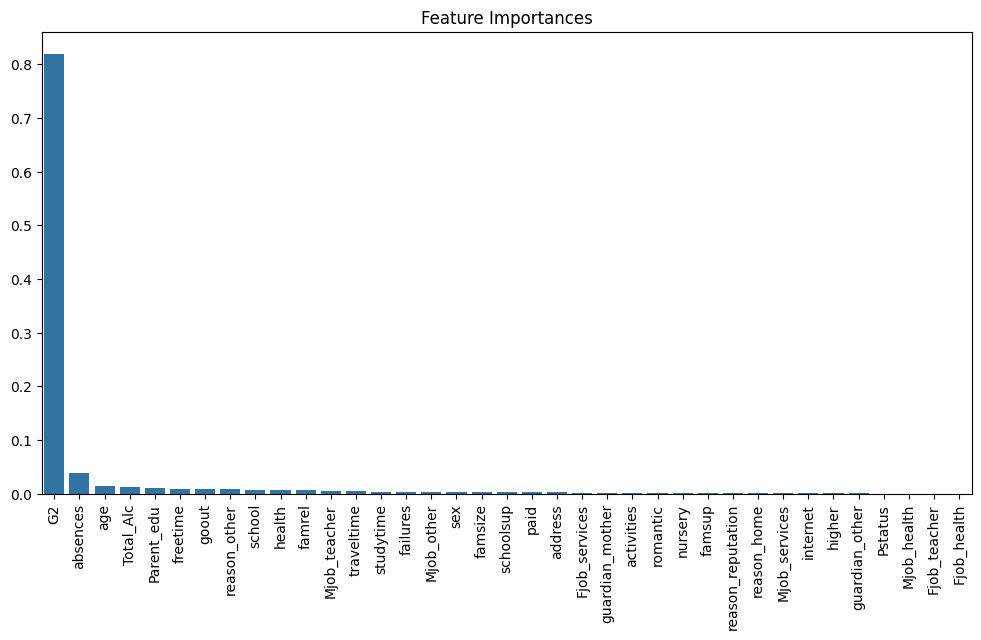

In [162]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_dict = {name: score for name, score in zip(feature_names, importances)}
# sorting the feature importance dictionary
feature_importance_dict = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))
print(feature_importance_dict)

# Plotting feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=list(feature_importance_dict.keys()), y=list(feature_importance_dict.values()))
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()



In [163]:
# select top 20 features
top_features = list(feature_importance_dict.keys())[:20]
X_train_scaled_top = X_train_scaled[top_features]
X_test_scaled_top = X_test_scaled[top_features]


In [164]:
X_train_scaled_top.head(2)

,G2,absences,age,Total_Alc,Parent_edu,freetime,goout,reason_other,school,health,famrel,Mjob_teacher,traveltime,studytime,failures,Mjob_other,sex,famsize,schoolsup,paid
579,-0.527557,-0.801979,0.988265,0.574369,-0.396564,-0.169875,-0.188474,0,1,-0.375232,0.095112,0,-0.772553,-1.097453,-0.383276,0,1,1,0,0
211,-0.170611,2.686390,-0.614136,2.039332,0.606445,-0.169875,0.658728,0,0,-0.375232,-0.958082,1,1.806410,-1.097453,-0.383276,0,1,1,0,0


In [165]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import numpy as np

def tolerance_accuracy(y_true, y_pred, tolerance=1):
    correct = np.abs(y_true - y_pred) <= tolerance
    accuracy = np.mean(correct)
    return accuracy

def evaluate_model(name, model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))  # Calculate RMSE
    r2 = r2_score(y_test, predictions)
    accuracy = tolerance_accuracy(y_test, predictions)
    print(f"{name} - RMSE: {rmse:.4f}, R^2: {r2:.4f}, Tolerance Accuracy: {accuracy:.4f}")


In [166]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Initialize models
tree_model = DecisionTreeRegressor(random_state=42)
linear_model = LinearRegression()
svm_model = SVR()

# Train the models on the top 20 features
tree_model.fit(X_train_scaled_top, y_train)
linear_model.fit(X_train_scaled_top, y_train)
svm_model.fit(X_train_scaled_top, y_train)

# Evaluate each model using the updated function
models = {'Decision Tree': tree_model, 'Linear Regression': linear_model, 'Support Vector Machine': svm_model}
for name, model in models.items():
    evaluate_model(name, model, X_test_scaled_top, y_test)


Decision Tree - RMSE: 1.8328, R^2: 0.6962, Tolerance Accuracy: 0.7795
Linear Regression - RMSE: 1.1231, R^2: 0.8859, Tolerance Accuracy: 0.7385
Support Vector Machine - RMSE: 1.7557, R^2: 0.7212, Tolerance Accuracy: 0.7282


In [227]:
def tolerance_accuracy(y_true, y_pred, tolerance):
    correct = np.abs(y_true - y_pred) <= tolerance
    accuracy = np.mean(correct)
    return accuracy

def evaluate_model(model, X_test, y_test, tolerance=1):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    print(f"RMSE: {rmse:.4f}, R^2: {r2:.4f}")
    accuracy = tolerance_accuracy(y_test, predictions, tolerance)
    print(f"Accuracy within {tolerance} of true value: {accuracy:.2%}")


In [228]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [229]:
evaluate_model(dt_model, X_test_scaled, y_test)

RMSE: 1.6377, R^2: 0.7575
Accuracy within 1 of true value: 83.08%


In [230]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [231]:
evaluate_model(lr_model, X_test_scaled, y_test)

RMSE: 1.1458, R^2: 0.8813
Accuracy within 1 of true value: 70.77%


In [232]:
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)

SVR()

In [233]:
evaluate_model(svm_model, X_test_scaled, y_test)

RMSE: 1.6520, R^2: 0.7532
Accuracy within 1 of true value: 73.85%


In [258]:
models = {
    'Decision Tree Regressor': dt_model,
    'Linear Regression': lr_model,
    'SVR': svm_model
}

results = {}

for name, model in models.items():
    predictions = model.predict(X_test_scaled)
    results[name] = {
        'MSE': mean_squared_error(y_test, predictions),
        'RMSE': root_mean_squared_error(y_test, predictions),
        'MAE': mean_absolute_error(y_test, predictions),
        'R2': r2_score(y_test, predictions)
    }

print(results)

{'Decision Tree Regressor': {'MSE': 2.682051282051282, 'RMSE': 1.637696944508135, 'MAE': 0.9692307692307692, 'R2': 0.7574592257530572}, 'Linear Regression': {'MSE': 1.3127573658577314, 'RMSE': 1.1457562419021472, 'MAE': 0.7647737214718046, 'R2': 0.8812859433209661}, 'SVR': {'MSE': 2.7291595350039572, 'RMSE': 1.6520168083297329, 'MAE': 0.9513637031766848, 'R2': 0.7531991759094822}}


In [272]:
metrics_df = pd.DataFrame(results).T

# for metric in metrics_df.columns:
#     metrics_df[metric].plot(kind='bar', figsize=(10, 5))
#     plt.title(metric)
#     plt.ylabel(metric)
#     plt.xlabel('Model')
#     plt.xticks(rotation=45)
#     plt.show()
metrics_df

,MSE,RMSE,MAE,R2
Decision Tree Regressor,2.682051,1.637697,0.969231,0.757459
Linear Regression,1.312757,1.145756,0.764774,0.881286
SVR,2.729160,1.652017,0.951364,0.753199


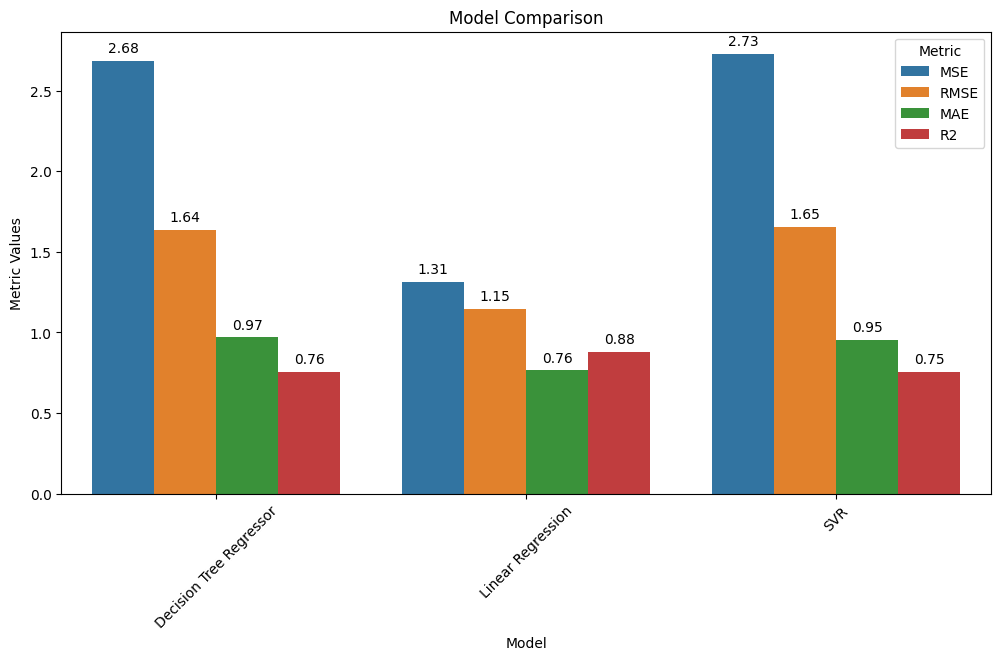

In [273]:
metrics_df = metrics_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')
metrics_df.rename(columns={'index': 'Model'}, inplace=True)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=metrics_df, x='Model', y='Value', hue='Metric')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Metric Values')
plt.xticks(rotation=45)
plt.legend(title='Metric')

plt.draw()

for p in barplot.patches:
    height = p.get_height()
    if height > 0:
        barplot.annotate(format(height, '.2f'),
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center',
                         xytext=(0, 9),
                         textcoords='offset points')

plt.show()


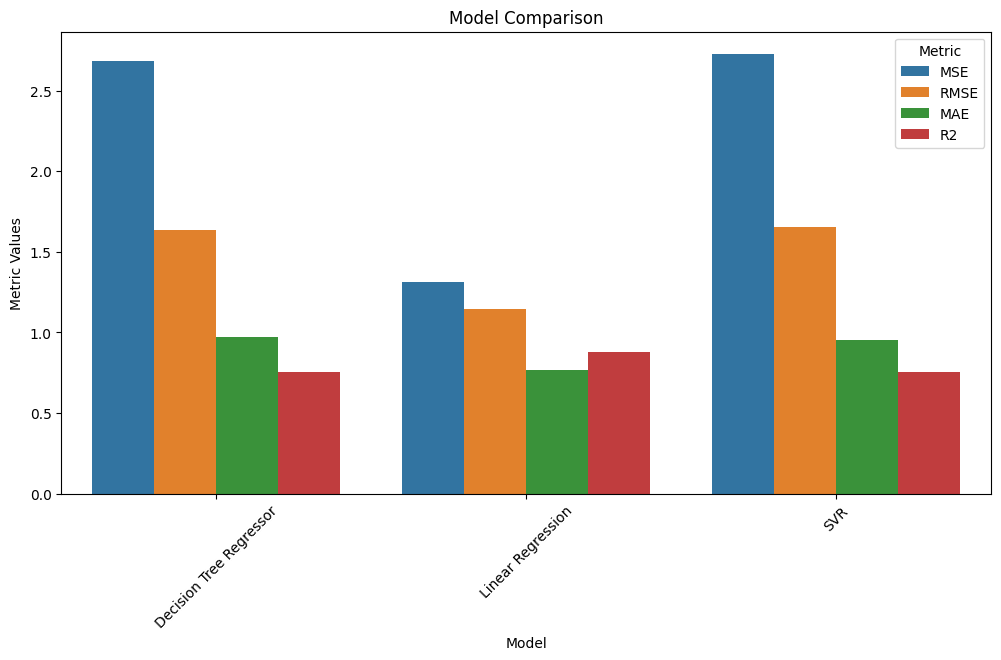

In [260]:
metrics_df = metrics_df.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')
metrics_df.rename(columns={'index': 'Model'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df, x='Model', y='Value', hue='Metric')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Metric Values')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()